In [1]:
import pandas as pd
import numpy as np
import regex as re
from collections import Counter
from wordcloud import WordCloud
from matplotlib import pyplot as plt
import seaborn as sns

In [44]:
df = pd.read_csv('reviews.csv')

In [45]:
df.head(20)

,Unnamed: 0,User_name,Review title,Review Rating,Review date,Review_body
0,0,Leofwine_draca,A new TV classic,10/10,9 October 2021,"Just finished up SQUID GAME, the Korean TV sho..."
1,1,kosmasp,Just a game,9/10,10 October 2021,"Well multiple games actually, but even that yo..."
2,2,Tweekums,Games to die for,10/10,11 October 2021,This runaway hit from South Korea is centred o...
3,3,FeastMode,"if you think this is good, PLEASE watch the ko...",5/10,9 October 2021,I went into this show knowing absolutely nothi...
4,4,Irishchatter,It started off strong but ended disoriented,7/10,8 October 2021,I honestly don't know wtf the main character n...
5,5,Edvis-1997,8,8/10,4 October 2021,I loved it but three last episodes killed the ...
6,6,John6Daniels,This puts a smile on my face.,1/10,15 October 2021,"Haha! I don't know if it's Korea, trolls, fanb..."
7,7,RosanaBotafogo,"Perfect, Beautiful and lovely...",10/10,12 October 2021,"Ep1 wonderful drama that we love, protagonist ..."
8,8,billcr12,Addicting,8/10,14 October 2021,A great concept here as desperate people with ...
9,9,alindsay-al,A Fantastic truly unique show,9/10,10 October 2021,So Squid Game has taken over the world these l...


In [46]:
import nltk
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{'once', "shouldn't", 'in', 'no', "wasn't", 've', 'my', 'herself', 'do', 'she', 'm', 'those', 'has', 'for', 'why', 'mightn', "you'd", 'as', "mustn't", 'wouldn', 'about', 'itself', "isn't", 'while', 'i', 'until', 'the', 'mustn', 'their', 'it', 'weren', 'or', 'ours', "should've", 're', 'his', 'shan', 'wasn', 'too', 'on', 'at', 'her', 's', "weren't", 'because', 'to', 'can', 'an', 'each', 'how', "didn't", "won't", 'o', "aren't", 'myself', 'very', 'by', 'again', 'then', "haven't", 'own', 'ourselves', 'after', "don't", 'me', 'won', 'against', 'here', 'above', 'yours', 'does', 'only', 'before', 'didn', 'y', 'below', 'such', 'shouldn', 'there', "needn't", 'who', 'all', 'these', 'just', 'down', 'through', 'whom', 'did', 'our', 'where', 'which', 'hadn', 'should', 'isn', 'was', "mightn't", 'will', 'but', 'they', "couldn't", "hasn't", 'we', 'ma', 'am', 'have', 'few', 'its', 'being', 'been', 'not', 'off', 'ain', "you'll", 'some', "she's", 'hers', 'are', 'out', 'any', 'this', 'were', "you've", "that

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:992)>


In [47]:
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

In [48]:
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]
pipeline = [str.lower, tokenize, remove_stop]

In [50]:
def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:tokens = fun(tokens)
    return tokens
df['tokens'] = df['Review_body'].apply(prepare, pipeline=pipeline)

In [51]:
counter = Counter()
df['tokens'].map(counter.update)
freq_df = pd.DataFrame.from_dict(counter, orient='index',columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
token,
helpful,2152
found,1142
review,1101
vote,1092
sign,1079
permalink,1076
show,904
game,709
series,675


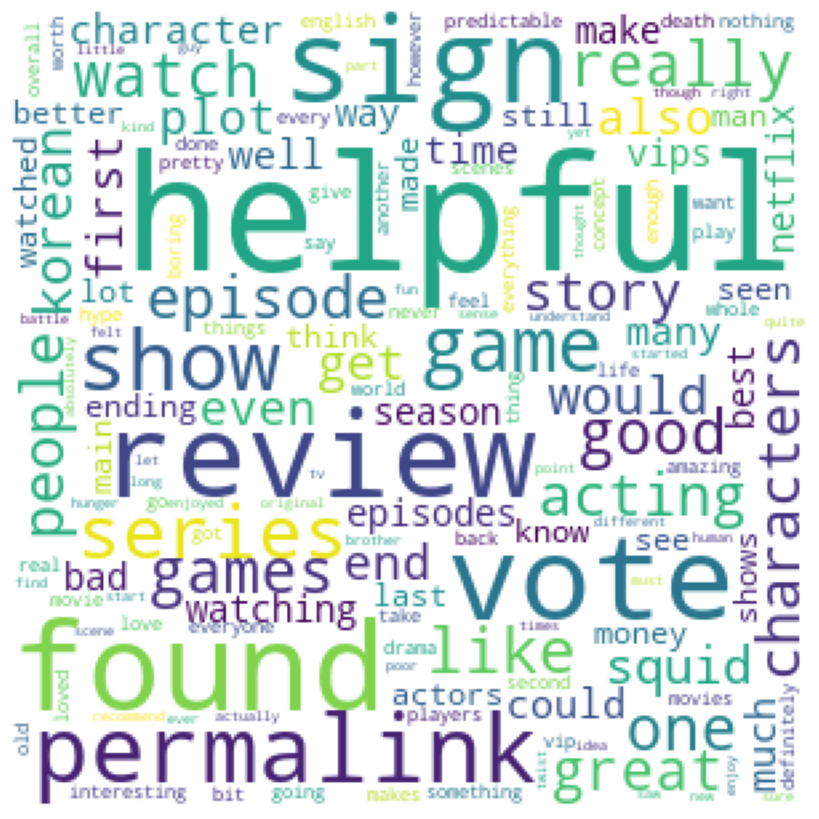

In [52]:
wc = WordCloud(background_color='white', width = 300, height=300, margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [53]:
def compute_idf(df, column='tokens', preprocess=None, min_df=1):
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))
    counter = Counter()
    df[column].map(update)# create data frame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
    idf_df.index.name = 'token'
    return idf_df
idf_df = compute_idf(df)

In [54]:
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']
freq_df.head()

,freq,tfidf
token,,
helpful,2152,422.851457
found,1142,211.728657
review,1101,212.252689
vote,1092,214.569606
sign,1079,212.015206


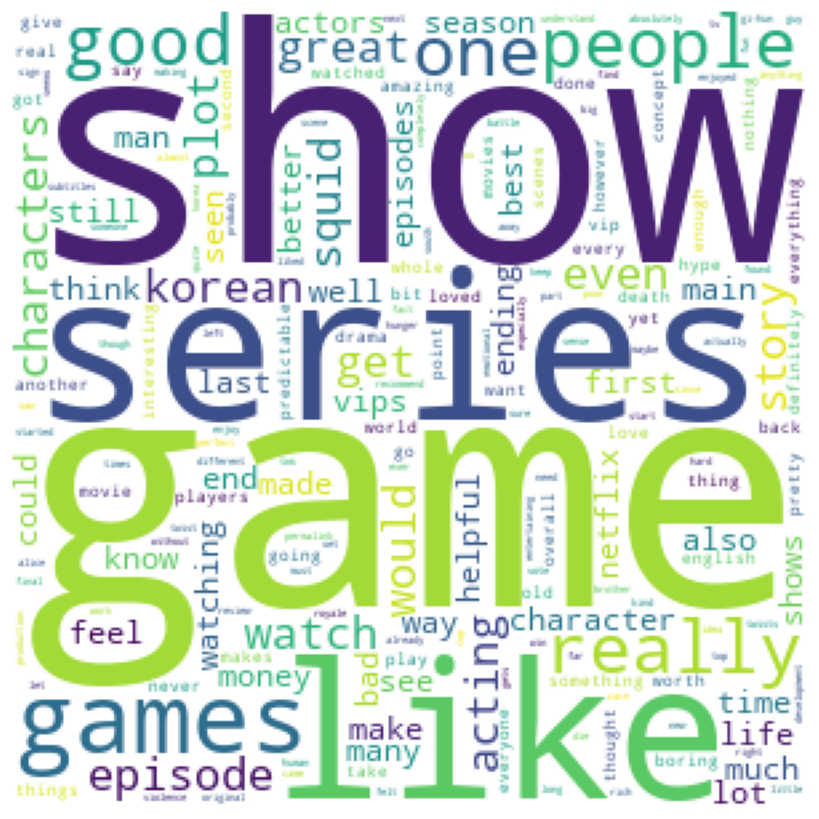

In [55]:
wc = WordCloud(background_color='white', width = 300, height=300,margin=2)
wc.fit_words(freq_df['tfidf'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

# 1970

In [56]:
df['num_tokens'] = df['tokens'].map(len)
def count_keywords(tokens, keywords):
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]

In [57]:
def count_keywords_by(df, by, keywords, column='tokens'):
    df = df.reset_index(drop=True) # if the supplied dataframe has gaps inthe index
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix,columns=keywords)
    freq_df[by] = df[by] # copy the grouping column(s)
    return freq_df.groupby(by=by).sum().sort_values(by)

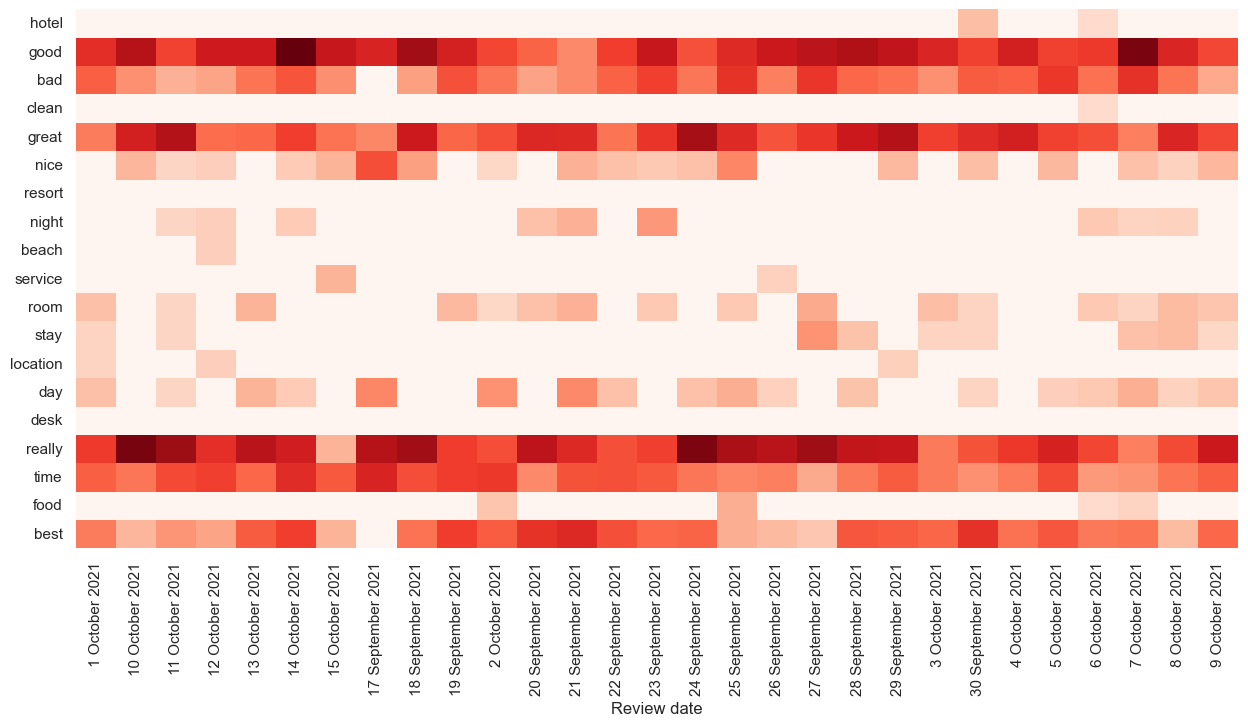

In [60]:
keywords = ['hotel','good','bad','clean','great','nice','resort','night','beach','service','room','stay','location','day','desk','really','time','food','best']
freq_df = count_keywords_by(df, by='Review date', keywords=keywords)
freq_df = freq_df.div(df.groupby('Review date')['num_tokens'].sum(), axis=0)
freq_df = freq_df.apply(np.sqrt)
# Plotting the heatmap
plt.figure(figsize=(15, 7))
sns.set(font_scale=1)
sns.heatmap(data=freq_df.T,xticklabels=True, yticklabels=True, cbar=False, cmap="Reds")
sns.set(font_scale=1)